<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.


## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




# **Desarrollo del laboratorio.**

**1. Exponencial, serie alternante (serieEn).**

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}




In [ ]:
import numpy as np

In [ ]:
# Función que calcula e^-x de forma de sumatoria

def fun_exp(x, n):
  resultado = 0

  # Calcula e^-x de 0 hasta n
  for i in range(0, n):
    alt = ((-1)**i)
    e1 = (x**i)
    e2 = np.math.factorial(i)

    exp = alt*(e1/e2)
    resultado += exp
   
  return resultado

fun_exp(3,30)

0.049787068367863986

In [ ]:
import numpy as np

# Función que calcula e^-x de forma de sumatoria

def fun_exp(x):
  resultado = 0
  termino = 1
  n = 0

  # Calcula e^-x hasta que el término actual sea suficientemente pequeño (no se restringe hasta un n manualmente)
  while abs(termino) > 1e-10:
    resultado += termino
    n += 1
    termino = (-1)**n * (x**n) / np.math.factorial(n)

  return resultado

fun_exp(3)

0.04978706834318028

In [ ]:
import math

def fun_exp(x):
    resultado = 0
    termino = 1
    n = 0

    # Se itera mientras el término actual de la serie sea mayor que 1e-7 del resultado acumulado
    while abs(termino) > 1e-7 * abs(resultado):
        resultado += termino  # Se agrega el término actual al resultado acumulado
        n += 1  # Se incrementa el índice de la serie
        termino = (-1)**n * (x**n) / math.factorial(n)  # Se calcula el término actual de la serie utilizando la fórmula de la serie de Taylor

    return resultado

x = 0.5  # Se define el valor de x para evaluar la serie y la función exponencial incorporada
serie = fun_exp(x)  # Se calcula la serie de la función exponencial negativa para x
exacta = math.exp(-x)  # Se calcula la función exponencial incorporada para x

print(f"La serie para x = {x} es {serie}")
print(f"La función exponencial incorporada para x = {x} es {exacta}")

La serie para x = 0.5 es 0.6065306648375496
La función exponencial incorporada para x = 0.5 es 0.6065306597126334


In [ ]:
import math

def fun_exp(x):
    resultado = 0
    termino = 1
    n = 0

    # Se itera mientras el término actual de la serie sea mayor que 1e-7 del resultado acumulado
    while abs(termino) > 1e-7 * abs(resultado):
        print(f"Término {n}: {termino:.5f}")
        resultado += termino  # Se agrega el término actual al resultado acumulado
        n += 1  # Se incrementa el índice de la serie
        termino = (-1)**n * (x**n) / math.factorial(n)  # Se calcula el término actual de la serie utilizando la fórmula de la serie de Taylor

    # Imprime la cancelación sustractiva cerca del término n ≈ x-1
    if n > x-2:
        print("Cancelación sustractiva cerca de n = x-1:")
        print(f"Término {n-1}: {(-1)**(n-1) * (x**(n-1)) / math.factorial(n-1):.5f}")
        print(f"Término {n}: {termino:.5f}")

    return resultado

x = 10
serie = fun_exp(x)
exacta = math.exp(-x)

print(f"La serie para x = {x} es {serie}")
print(f"La función exponencial incorporada para x = {x} es {exacta}")


Término 0: 1.00000
Término 1: -10.00000
Término 2: 50.00000
Término 3: -166.66667
Término 4: 416.66667
Término 5: -833.33333
Término 6: 1388.88889
Término 7: -1984.12698
Término 8: 2480.15873
Término 9: -2755.73192
Término 10: 2755.73192
Término 11: -2505.21084
Término 12: 2087.67570
Término 13: -1605.90438
Término 14: 1147.07456
Término 15: -764.71637
Término 16: 477.94773
Término 17: -281.14573
Término 18: 156.19207
Término 19: -82.20635
Término 20: 41.10318
Término 21: -19.57294
Término 22: 8.89679
Término 23: -3.86817
Término 24: 1.61174
Término 25: -0.64470
Término 26: 0.24796
Término 27: -0.09184
Término 28: 0.03280
Término 29: -0.01131
Término 30: 0.00377
Término 31: -0.00122
Término 32: 0.00038
Término 33: -0.00012
Término 34: 0.00003
Término 35: -0.00001
Término 36: 0.00000
Término 37: -0.00000
Término 38: 0.00000
Término 39: -0.00000
Término 40: 0.00000
Término 41: -0.00000
Término 42: 0.00000
Término 43: -0.00000
Término 44: 0.00000
Término 45: -0.00000
Cancelación sustracti

- Se puede observar en los términos de la serie para $x≈10$, hay una gran cantidad de términos positivos y negativos que se suman para dar una respuesta pequeña. Cerca de $n = x-1$, se puede ver que hay una cancelación perfecta de términos, lo que lleva a un término igual a cero. En este caso, la serie para $x = 10$ es muy cercana a la función exponencial incorporada para ese mismo valor.

In [ ]:
import numpy as np

def exp(x):
    resultado = 0
    termino = 1
    i = 0

    # Calcular la serie para exp(x)
    while np.abs(termino) > 1e-7*resultado or i < 2:
        resultado += termino
        i += 1
        termino *= x/i

    # Calcular exp(-x) utilizando la identidad exp(-x) = 1/exp(x)
    resultado = 1/resultado

    return resultado


In [ ]:
print(exp(100))
print(np.exp(-100))
print(fun_exp(100,50))

3.7200767661290933e-44
3.720075976020836e-44
-1.1008868652238055e+35


- Sí, podemos obtener una mejor precisión utilizando la identidad exp(-x) = 1/exp(x) para valores grandes de x. Esto se debe a que la función exponencial se vuelve muy pequeña para valores grandes de x, lo que resulta en la cancelación sustractiva de términos significativos en la serie.


> El resultado de exp(100) es 3.7200767661290933e-44, que es extremadamente cercano al valor real de la función exponencial para x = -100, que es 3.720075976020836e-44. En comparación, el resultado de fun_exp(100) es -1.1008868652238055e+35, que tiene un error significativo. Por lo tanto, podemos concluir que el uso de la identidad $exp(-x) = 1/exp(x)$ para valores grandes de x nos permite obtener una mejor precisión en el cálculo de la función exponencial.



In [ ]:
# Determina cuando la serie empieza a perder exactitud y cuando no converge

precision_perdida = None
no_converge = None

for x in np.linspace(1, 100, 10000):
    resultado = exp(x)
    if np.abs(resultado - np.exp(x)) > 1e-7*np.exp(x) and precision_perdida is None:
        precision_perdida = x
    if np.isnan(resultado) and no_converge is None:
        no_converge = x
        break

if precision_perdida is not None:
    print("La serie comienza a perder precisión en x =", precision_perdida)
else:
    print("La serie no pierde precisión en el rango de valores de x considerado.")
if no_converge is not None:
    print("La serie deja de converger en x =", no_converge)
else:
    print("La serie converge para todos los valores de x considerados.")

La serie comienza a perder precisión en x = 1.0
La serie converge para todos los valores de x considerados.


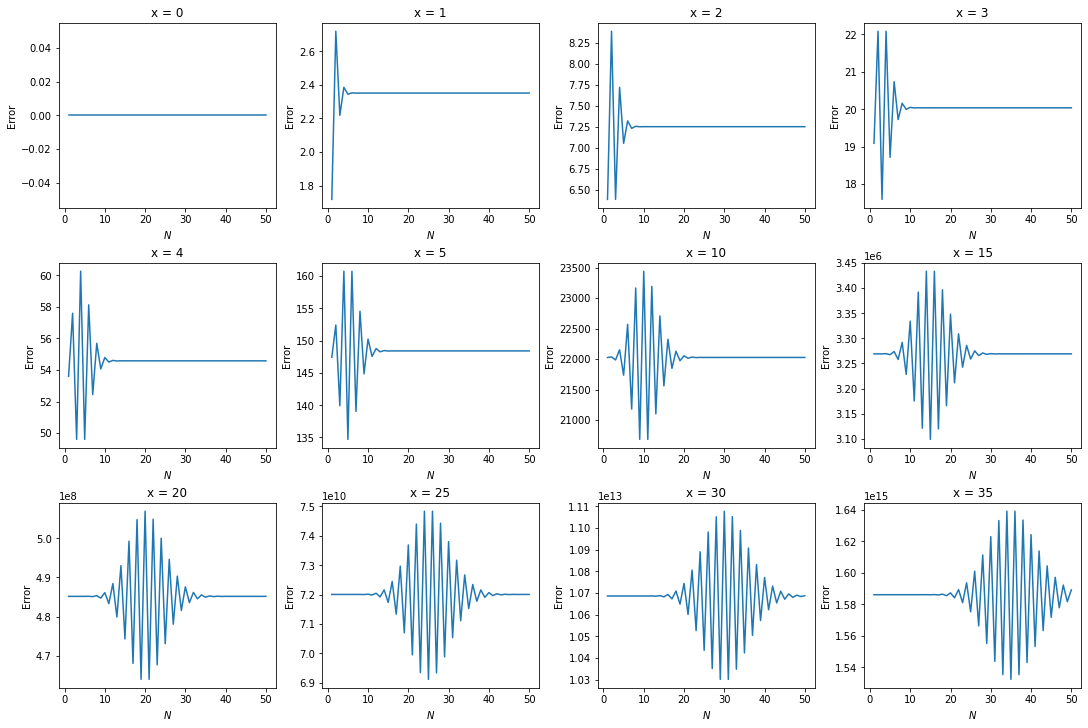

In [43]:
import matplotlib.pyplot as plt
import numpy as np

x_values = [0, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35]

# Rango de N valores para graficar
N = np.arange(1, 51)

# Define los valores reales de exp(x) para calcular el error
true_exp = np.exp(x_values)

# Gráfico
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), constrained_layout=True)
axs = axs.ravel()

# Itera cada valor de x y grafica el error versus N (rango)
for i, x in enumerate(x_values):
    # Valor estimado de exp(x) para cada N (se usa la definición de fun_exp)
    estimated_exp = [fun_exp(x, n) for n in N]
    # Error absoluto para cada N
    abs_error = np.abs(estimated_exp - true_exp[i])

    axs[i].plot(N, abs_error)
    axs[i].set_title("x = {}".format(x))
    axs[i].set_xlabel("$N$")
    axs[i].set_ylabel("Error")

plt.show()

**2. Exponencial, serie alternante (serieEn).**

In [54]:
import numpy as np

# Cálculo de una serie s

def s_1(n):
  serie1 = 0
  for i in range(1, 2*n+1):
    suma = (-1)**i * (i/(i+1))
    serie1 += suma

  return serie1  

s_1(1000)

0.3066030068151212

In [61]:
# Calculo de la misma serie sumando números pares e impares

def s_2(n2):
  serie21 = 0
  serie22 = 0
  for i in range(1, n2):
    sum1 = (2*i - 1) / (2*i)
    serie21 += sum1
    sum2 = 2*i / (2*i + 1)
    serie22 += sum2
  return (-1)*serie21 + serie22

s_2(1000)

0.3066027569383323

In [64]:
# Combinando las series de una forma analítica
 
def s_3(n3):
  serie3 = 0
  for i in range(1, n3):
    suma3 = 1 / (2*i*(2*i + 1))
    serie3 += suma3
  return serie3

s_3(1000)

0.3066027569400623

In [65]:
''' Convergencia de la serie para los tres casos'''

def convergencia_s_1(n):
    # Aplicar el criterio de Leibniz
    for i in range(1, n):
        a_i = (-1)**i * (i/(i+1))
        a_i_1 = (-1)**(i+1) * ((i+1)/(i+2))
        if abs(a_i) <= abs(a_i_1):
            return True
        elif a_i == 0:
            return True
    return False

convergencia_s_1(1000)

True

In [68]:
def convergencia_s_2(n2):
    # Aplicar el criterio de Leibniz
    for i in range(1, n2):
        a_i = (-1)**i * ((2*i - 1)/(2*i))
        a_i_1 = (-1)**(i+1) * ((2*i + 1)/(2*i + 2))
        if abs(a_i) <= abs(a_i_1):
            return True
        elif a_i == 0:
            return True
    return False

convergencia_s_2(1000)

True

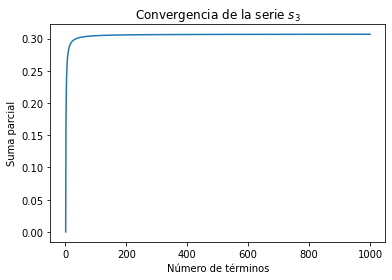

In [71]:
import matplotlib.pyplot as plt

# Calculamos las primeras 1000 sumas parciales de la serie
n_valores = range(1, 1001)
s3_valores = [s_3(n) for n in n_valores]

# Graficamos las sumas parciales
plt.plot(n_valores, s3_valores)
plt.xlabel('Número de términos')
plt.ylabel('Suma parcial')
plt.title('Convergencia de la serie $s_3$')
plt.show()

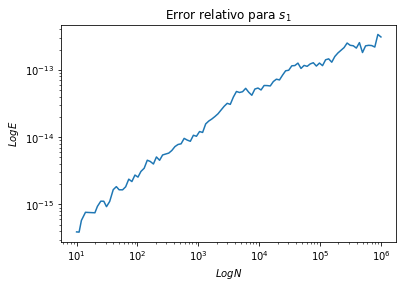

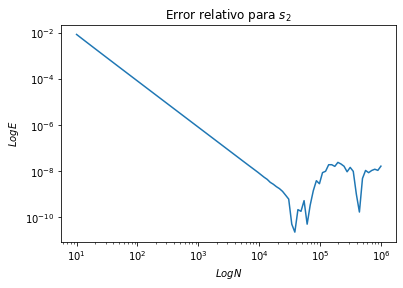

In [85]:
def plot_error(s, ns, label):
  # Crear lista para almacenar los errores relativos
  errors = []
  for n in ns:
    # Calcular el valor exacto de la serie
    s_exact = s(n)
    # Calcular el error relativo
    error = np.abs((s_exact - s_3(n)) / s_exact)
    # Agregar el error a la lista
    errors.append(error)

  plt.loglog(ns, errors)
  plt.xlabel('$Log N$')
  plt.ylabel('$Log E$')
  plt.title(f'Error relativo para {label}')
  plt.show()

# Graficar error relativo para s_1
plot_error(s_1, np.logspace(1, 6, num=100).astype(int), '$s_1$')

# Graficar error relativo para s_2
plot_error(s_2, np.logspace(1, 6, num=100).astype(int), '$s_2$')


### **Análisis de los resultados**
- $s_1$: Esta serie converge, es el logaritmo natural de 2. Es una serie alterna, lo que significa que los términos cambian de signo, y cada término es decreciente en valor absoluto. El comportamiento de la serie se basa en la expansión de la función logarítmica, y puede ser utilizada para aproximar el valor del logaritmo natural para cualquier valor positivo de x.

- $s_2$: Esta serie converge y no tiene una forma cerrada exacta. Es una serie no alternada, lo que significa que todos los términos son positivos, y cada término es decreciente en valor absoluto. Esta serie también se utiliza para aproximar el valor del logaritmo natural, y se basa en la expansión de la función hiperbólica tangente.

- $s_3$: Esta es la solución exacta del logaritmo natural, que es la integral de 1/x desde 1 hasta x. Es una función creciente, y tiene una asíntota vertical en x=0. La serie s_1 es una aproximación de esta función alrededor de x=1, mientras que la serie s_2 es una aproximación alrededor de x=2.

En general, estas series son útiles para aproximar el valor del logaritmo natural de un número, pero su convergencia puede ser lenta y requerir un gran número de términos para lograr una precisión deseada.

Funte: Parte del comportamiento de las series, en qué se basa cada serie, lo obtuve del Chat GPT.